<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36" lang="ko"><head>
<title>네이버페이 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버페이 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버페이 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버페이 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstoc
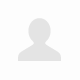
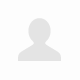

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

# HTML 파일을 읽기 모드로 열기
with open("네이버증시_24-08-22.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html_content, "html.parser")
soup

# 코스피, 코스닥, 코스피200 지수 정보 추출

In [13]:
# soup.find("div", class_="kosdaq_area").find("span", class_="num_quot").find("span", class_="num").text.strip()

'773.20'

In [14]:
soup.find("div", class_="kosdaq_area").find("span", class_="num_quot").text

'773.20\n6.67\n-0.86%\n하락'

In [10]:
kospi_info = soup.find("div", class_="kospi_area").find("span", class_="num_quot").text.strip().split()
kosdaq_info = soup.find("div", class_="kosdaq_area").find("span", class_="num_quot").text.strip().split()
kospi200_info = soup.find("div", class_="kospi200_area").find("span", class_="num_quot").text.strip().split()

# 데이터프레임 생성
data = {
    "항목": ["코스피 지수", "코스닥 지수", "코스피 200 지수"],
    "가격": [kospi_info[0], kosdaq_info[0], kospi200_info[0]],
    "등락액": [kospi_info[1], kosdaq_info[1], kospi200_info[1]],
    "등락률": [kospi_info[2], kosdaq_info[2], kospi200_info[2]]
}

df = pd.DataFrame(data)
df

,항목,가격,등락액,등락률
0,코스피 지수,"2,695.53",5.60,-0.21%
1,코스닥 지수,773.20,6.67,-0.86%
2,코스피 200 지수,367.09,1.13,-0.31%


# TOP 종목에서 '거래상위' 항목 수집
* 종목명, 현재가, 전일대비, 등락률 추출

In [3]:
# '거래상위' 항목에서 종목명, 현재가, 전일대비, 등락률 추출
top_items_table = soup.find("tbody", id="_topItems1")
top_items_table

<tbody id="_topItems1">
<tr class="up">
<th scope="row"><a href="/item/main.naver?code=252670" onclick="clickcr(this, 'spe.slist', '252670', '1', event);">KODEX 200선물인버스2X</a></th>
<td>1,993</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 12</td>
<td>
<em class="up">
				+0.61%
				</em>
</td>
</tr>
<tr class="up">
<th scope="row"><a href="/item/main.naver?code=001250" onclick="clickcr(this, 'spe.slist', '001250', '2', event);">GS글로벌</a></th>
<td>4,170</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 640</td>
<td>
<em class="up">
				+18.13%
				</em>
</td>
</tr>
<tr class="up">
<th scope="row"><a href="/item/main.naver?code=478780" onclick="clickcr(this, 'spe.slist', '478780', '3', event);">대신밸런스제18호스팩</a></th>
<td>2,110</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 110</td>
<td>
<em class="up">
				+5.50%
				</em>
</td>
</tr>
<tr class="up">
<th scope="row"><a href="/item/main.naver?code=476080" onclick="clickcr(this, 'spe

In [4]:
top_items_rows = top_items_table.find_all("tr")
top_items_rows

[<tr class="up">
 <th scope="row"><a href="/item/main.naver?code=252670" onclick="clickcr(this, 'spe.slist', '252670', '1', event);">KODEX 200선물인버스2X</a></th>
 <td>1,993</td>
 <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 12</td>
 <td>
 <em class="up">
 				+0.61%
 				</em>
 </td>
 </tr>,
 <tr class="up">
 <th scope="row"><a href="/item/main.naver?code=001250" onclick="clickcr(this, 'spe.slist', '001250', '2', event);">GS글로벌</a></th>
 <td>4,170</td>
 <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 640</td>
 <td>
 <em class="up">
 				+18.13%
 				</em>
 </td>
 </tr>,
 <tr class="up">
 <th scope="row"><a href="/item/main.naver?code=478780" onclick="clickcr(this, 'spe.slist', '478780', '3', event);">대신밸런스제18호스팩</a></th>
 <td>2,110</td>
 <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 110</td>
 <td>
 <em class="up">
 				+5.50%
 				</em>
 </td>
 </tr>,
 <tr class="up">
 <th scope="row"><a href="/item/main.naver?code=476080" onclick="clickcr

In [5]:
top_items_data = []
for row in top_items_rows:
    item_name = row.find("a").text.strip()
    columns = row.find_all("td")
    current_price = columns[0].text.strip()
    change_price = columns[1].text.strip()
    change_percent = columns[2].text.strip()
    top_items_data.append([item_name, current_price, change_price, change_percent])

# 데이터프레임 생성
top_items_df = pd.DataFrame(top_items_data, columns=["종목명", "현재가", "전일대비", "등락률"])
top_items_df

,종목명,현재가,전일대비,등락률
0,KODEX 200선물인버스2X,"1,993",상승 12,+0.61%
1,GS글로벌,"4,170",상승 640,+18.13%
2,대신밸런스제18호스팩,"2,110",상승 110,+5.50%
3,M83,"44,900","상승 28,900",+180.63%
4,삼부토건,730,하락 37,-4.82%
5,KODEX 코스닥150선물인버스,"3,690",상승 25,+0.68%
6,에스와이스틸텍,"4,700",하락 130,-2.69%
7,삼성 인버스 2X WTI원유 선물 ETN,99,상승 4,+4.21%
8,에이프로젠,"1,697",상승 97,+6.06%
9,랩지노믹스,"3,985",하락 375,-8.60%


* 'TOP 종목'은 브라우저상에서는 클릭을 해야 볼수 있는 정보이다.
* 만약에 클릭할때마다 웹주소가 바뀐다면 바뀐주소로 스크래핑해야한다.
* 'TOP 종목' 클릭해도 주소가 바뀌어 새로운 링크로 로드가되는 페이지가 아니다.
* 이 경우 셀레니엄에서 해당 데이터가 보이는지 확인해야한다.
    * 해당 데이터가 보인다면 바로 스크래핑한다.
    * 해당 데이터가 보이지 않는다면 브라우저 제어 기술을 사용해야한다.

# TOP 종목에서 '상승' 항목 수집

In [6]:
top_items_table = soup.find("tbody", id="_topItems2")
top_items_rows = top_items_table.find_all("tr")
top_items_data = []
for row in top_items_rows:
    item_name = row.find("a").text.strip()
    columns = row.find_all("td")
    current_price = columns[0].text.strip()
    change_price = columns[1].text.strip()
    change_percent = columns[2].text.strip()
    top_items_data.append([item_name, current_price, change_price, change_percent])

# 데이터프레임 생성
top_items2_df = pd.DataFrame(top_items_data, columns=["종목명", "현재가", "전일대비", "등락률"])
top_items2_df

,종목명,현재가,전일대비,등락률
0,M83,"44,900","상승 28,900",+180.63%
1,세기상사,"7,440","상한가 1,710",+29.84%
2,미래아이앤지,"1,350",상승 290,+27.36%
3,유한양행우,"119,600","상승 23,000",+23.81%
4,엔피디,"3,525",상승 605,+20.72%
5,KC코트렐,463,상승 73,+18.72%
6,GS글로벌,"4,170",상승 640,+18.13%
7,뉴트리,"11,460","상승 1,720",+17.66%
8,리튬포어스,"2,550",상승 330,+14.86%
9,진시스템,"11,370","상승 1,290",+12.80%


# TOP 종목에서 '하락' 항목 수집

In [7]:
top_items_table = soup.find("tbody", id="_topItems3")
top_items_rows = top_items_table.find_all("tr")
top_items_data = []
for row in top_items_rows:
    item_name = row.find("a").text.strip()
    columns = row.find_all("td")
    current_price = columns[0].text.strip()
    change_price = columns[1].text.strip()
    change_percent = columns[2].text.strip()
    top_items_data.append([item_name, current_price, change_price, change_percent])

# 데이터프레임 생성
top_items3_df = pd.DataFrame(top_items_data, columns=["종목명", "현재가", "전일대비", "등락률"])
top_items3_df

,종목명,현재가,전일대비,등락률
0,이오플로우,"8,730","하한가 -3,730",-29.94%
1,DH오토웨어,243,하락 -97,-28.53%
2,이렘,"1,760",하락 -410,-18.89%
3,셀리드,"8,350","하락 -1,850",-18.14%
4,진매트릭스,"5,110","하락 -1,020",-16.64%
5,미코바이오메드,"2,160",하락 -410,-15.95%
6,소마젠,"5,130",하락 -810,-13.64%
7,EG,"8,590","하락 -1,340",-13.49%
8,그린생명과학,"2,995",하락 -450,-13.06%
9,세니젠,"3,435",하락 -480,-12.26%


# TOP 종목에서 '시가총액 상위' 항목 수집

In [8]:
top_items_table = soup.find("tbody", id="_topItems4")
top_items_rows = top_items_table.find_all("tr")
top_items_data = []
for row in top_items_rows:
    item_name = row.find("a").text.strip()
    columns = row.find_all("td")
    current_price = columns[0].text.strip()
    change_price = columns[1].text.strip()
    change_percent = columns[2].text.strip()
    top_items_data.append([item_name, current_price, change_price, change_percent])

# 데이터프레임 생성
top_items4_df = pd.DataFrame(top_items_data, columns=["종목명", "현재가", "전일대비", "등락률"])
top_items4_df

,종목명,현재가,전일대비,등락률
0,삼성전자,"77,800",하락 500,-0.64%
1,SK하이닉스,"189,600","하락 3,000",-1.56%
2,LG에너지솔루션,"361,000","상승 11,000",+3.14%
3,삼성바이오로직스,"958,000","상승 10,000",+1.05%
4,현대차,"247,500","하락 5,000",-1.98%
5,삼성전자우,"62,200",하락 700,-1.11%
6,셀트리온,"201,500","상승 1,700",+0.85%
7,기아,"102,300",하락 700,-0.68%
8,KB금융,"85,800","하락 1,400",-1.61%
9,신한지주,"57,900",하락 900,-1.53%


# TOP 종목에서 '테마 상위' 항목 수집

In [ ]:
top_items_table = soup.find("div", class_= "section_top group_top")
top_items_rows = top_items_table.find_all("h2", class_= "h_theme")
top_items_data = []
for row in top_items_rows:
    item_name = row.find("a").text.strip()
    columns = row.find_all("td")
    current_price = columns[0].text.strip()
    change_price = columns[1].text.strip()
    change_percent = columns[2].text.strip()
    top_items_data.append([item_name, current_price, change_price, change_percent])

# 데이터프레임 생성
top_items4_df = pd.DataFrame(top_items_data, columns=["종목명", "현재가", "전일대비", "등락률"])
top_items4_df

In [19]:
top_items_table.find_all("h2", class_= "h_theme")

[]

In [16]:
soup.find("div", class_= "section_top group_top")

<div class="section_top group_top">
<h2 class="h_theme"><span>테마상위</span></h2>
<ul class="list_rank">
<li class="ranking1">
<span class="info_num info_num1"><span class="blind">1</span></span>
<p class="item">
<a href="/sise/sise_group_detail.naver?type=theme&amp;no=562" onclick="clickcr(this, 'pol.type1', 'thema_562', '', event);"><strong>2024 하반기 신..</strong></a>
<em class="up">
				+10.32%
				</em>
</p>
<p>
<a href="/item/main.naver?code=476080" onclick="clickcr(this, 'pol.list1', '476080', '1', event);">
									M83
									</a>
<em class="up">
				+180.63%
				</em>
</p>
<p>
<a href="/item/main.naver?code=460470" onclick="clickcr(this, 'pol.list1', '460470', '2', event);">
									아이빔테크..
									</a>
<em class="up">
				+12.13%
				</em>
</p>
</li>
<li class="ranking2">
<span class="info_num info_num2"><span class="blind">2</span></span>
<p class="item">
<a href="/sise/sise_group_detail.naver?type=theme&amp;no=127" onclick="clickcr(this, 'pol.type2', 'thema_127', '', event);

In [ ]:
top_items_table = soup.find("tbody", id="_topItems4")